# Welcome to the Future of Healthcare BI Analytics in the NHS 😉

By Matt Stammers
Date: 24/02/2024

This script was developed by me messing around with optimal environment setups for BI analysts. I have tried to strike the right balance between minimising complexity and maximising impact demonstrating the power of python to analyse a dataset. 

It is fully available under the licence on the repo to anyone who wants to take it, remix it or build upon it 😁. The point is to take it, learn as much as you can from it and then start to apply it to your own projects / work as that is the best way to learn.

In [47]:
# Import Required Dependencies

# Data Handling and Basic Packages
import pandas as pd
import datetime as dt
import numpy as np
from pathlib import Path
import os
from time import strftime
from itertools import cycle

# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import show, output_notebook
from bokeh.models import ColumnDataSource, FactorRange, HoverTool
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.palettes import Category20

# Data Profiling
from ydata_profiling import ProfileReport

# Modelling Packages
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

# Not used in this script but will be used in future scripts
# import statsmodels
# import scipy 
# from sklearn.model_selection import GridSearchCV

# Load The Data In

First we load the data in and clean it up a bit

In [48]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Set Root Directory and Import Data
# This bit gets you one level above your current location within a notebook. To go 2 levels up substitute the 0 for a 1.
ROOT = Path(os.getcwd()).parents[0]

# This bit obtains the data
df=pd.read_csv(str(ROOT)+'/data/no_shows.zip')

In [49]:
# Cleaning Up Typos

df.rename(columns = {'ApointmentData':'AppointmentData',
                         'Alcoolism': 'Alchoholism',
                         'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)

print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show'],
      dtype='object')


# Error Checking

Before going on we need to check for obvious errors in the data

In [50]:
# Print the results

print('Age:',sorted(df.Age.unique()))
print('Gender:',df.Gender.unique())
print('Neighbourhood:',df.Neighbourhood.unique())
print('Scholarship:',df.Scholarship.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Hypertension:',df.Hypertension.unique())
print('Handicap:',df.Handicap.unique())
print('No-show:',df['No-show'].unique())
print('SMS_received:',df.SMS_received.unique())
print('ScheduledDay:',sorted(df.ScheduledDay.unique()))
print('AppointmentDay:', sorted(df.AppointmentDay.unique()))

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Neighbourhood: ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANGUETÁ' 'UNIVERSITÁRIO'
 'S

In [51]:
# The ages are a bit funky so lets fix them

df = df[(df.Age >=0) & (df.Age <=100)]

There are lots of other errors you could look for here such as whether the babies have hypertension (which would be medically nonsensical if occuring often) but for now we will move on

# Basic Exploratory Data Analysis (EDA) with Matplotlib

Here is how to explore some data using matplotlib, seaborne and bokeh

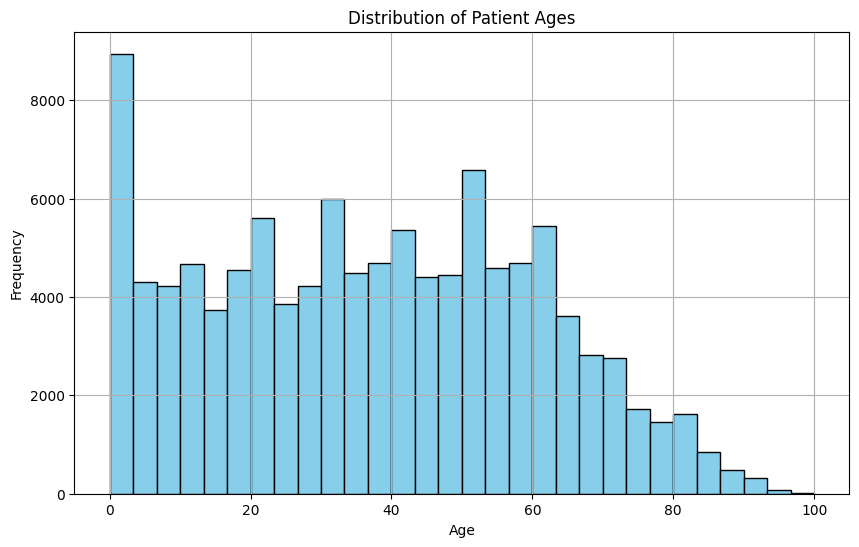

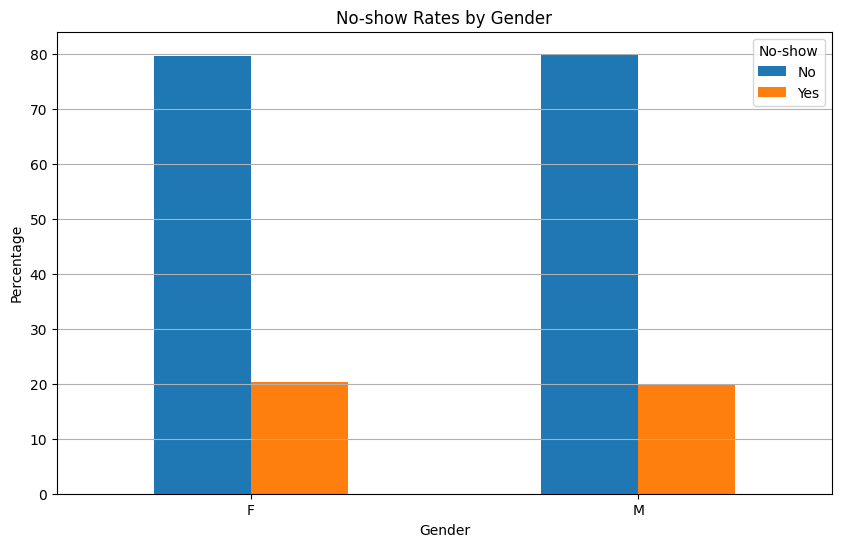

In [52]:
# Matplotlib

# Distribution of Ages
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
# Save the figure
plt.savefig('figures/distribution_of_patient_ages.png', format='png', dpi=600)
plt.show()

# No-show rates by gender
no_show_rates = df.groupby('Gender')['No-show'].value_counts(normalize=True).unstack() * 100
no_show_rates.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e'])
plt.title('No-show Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='No-show')
plt.grid(axis='y')
# Save the figure
plt.savefig('figures/no_show_rates_by_gender.png', format='png', dpi=600)
plt.show()


# Y Data Profiler

It would take ages to plot the entire dataset using matplotlib - so instead there is another clever tool which can help us speed this process along significantly. Watch below

In [53]:
# First fix the dates as they are currently objects
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['Sched_Appt'] = df['AppointmentDay'] - df['ScheduledDay']
df['Sched_To_Appt'] = df['Sched_Appt'].dt.days
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convert 'Gender' to a binary format where 'F' = 1 and 'M' = 0
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'F' else 0)

# Convert 'No-show' to a binary format where 'Yes' = 1 and 'No' = 0
df['No-show'] = df['No-show'].apply(lambda x: 1 if x == 'Yes' else 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110519 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110519 non-null  float64            
 1   AppointmentID   110519 non-null  int64              
 2   Gender          110519 non-null  int64              
 3   ScheduledDay    110519 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110519 non-null  datetime64[ns, UTC]
 5   Age             110519 non-null  int64              
 6   Neighbourhood   110519 non-null  object             
 7   Scholarship     110519 non-null  int64              
 8   Hypertension    110519 non-null  int64              
 9   Diabetes        110519 non-null  int64              
 10  Alcoholism      110519 non-null  int64              
 11  Handicap        110519 non-null  int64              
 12  SMS_received    110519 non-null  int64              
 13  No-show         110

In [54]:
# Profile the data inline

profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\stammm\.virtualenvs\02_Notebook_and_Pipenv-ez3FHhZZ\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 2 2 2]' has dtype incompatible with timedelta64[ns], please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [55]:
# Or export 

profile.to_file("reports/data_profile.html")

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [56]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'Sched_Appt', 'Sched_To_Appt'],
      dtype='object')

# Seaborn

This is a statistical plotting library allowing for more complex exploratory data analysis

In [57]:
# First we Need to Create a set of Analysis Ready Float Only Data Cuts
df1 = df[['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show']]
df2 = df[['Gender', 'Age', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show']]

c:\Users\stammm\.virtualenvs\02_Notebook_and_Pipenv-ez3FHhZZ\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\stammm\.virtualenvs\02_Notebook_and_Pipenv-ez3FHhZZ\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\stammm\.virtualenvs\02_Notebook_and_Pipenv-ez3FHhZZ\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


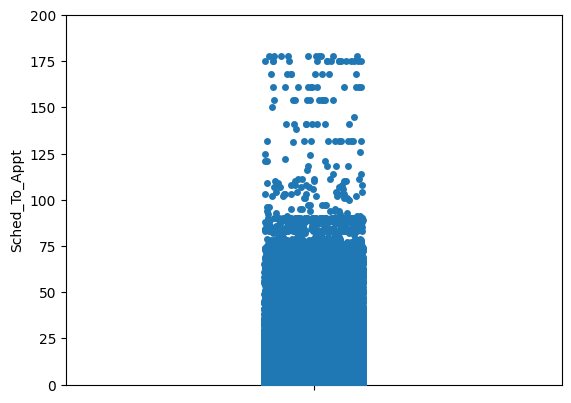

In [58]:
# First lets check the Sched to Appointment Times

# Assuming 'Sched_To_Appt' is a column in your DataFrame 'df' that you want to plot
sns.stripplot(data=df, y='Sched_To_Appt', jitter=True)

# Use matplotlib's pyplot (plt) to set ylim and show the plot
plt.ylim(0, 200)
plt.show()

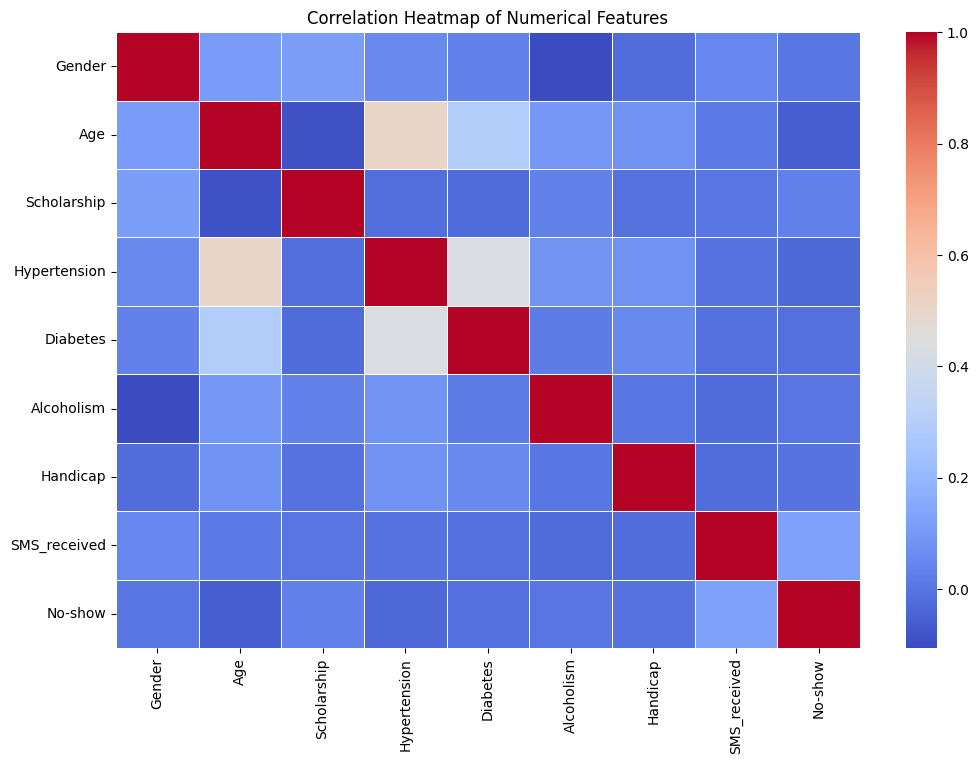

In [59]:
# Seaborn Heatmap 

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('figures/correlation_heatmap_of_numerical_features.png', format='png', dpi=600)
plt.show()

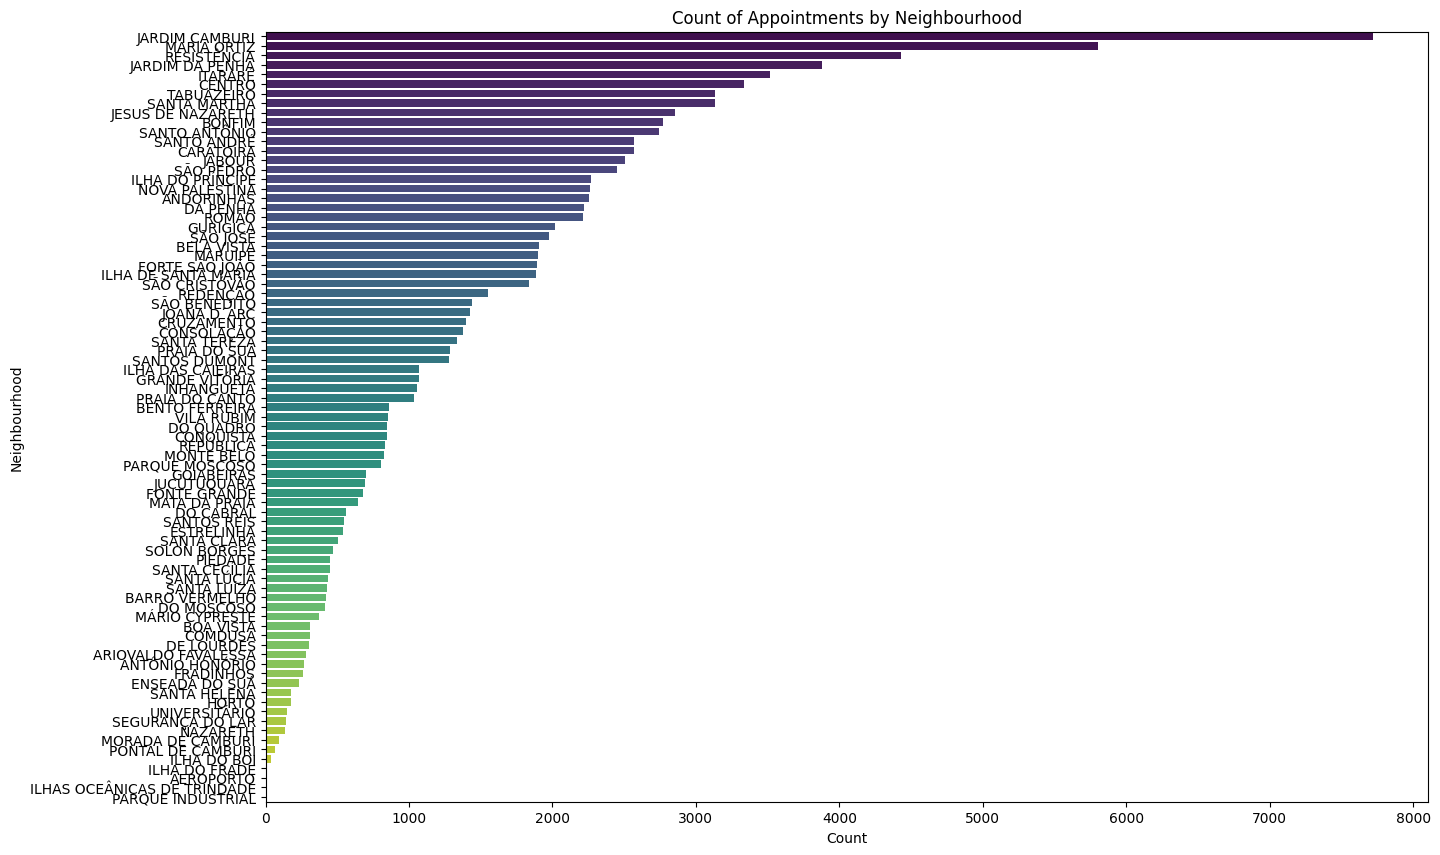

In [60]:
# Count of appointments by neighbourhood
plt.figure(figsize=(15, 10))
sns.countplot(y='Neighbourhood', data=df, order=df['Neighbourhood'].value_counts().index, palette='viridis')
plt.title('Count of Appointments by Neighbourhood')
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.savefig('figures/count_of_appointments_by_neighbourhood.png', format='png', dpi=600)
plt.show()

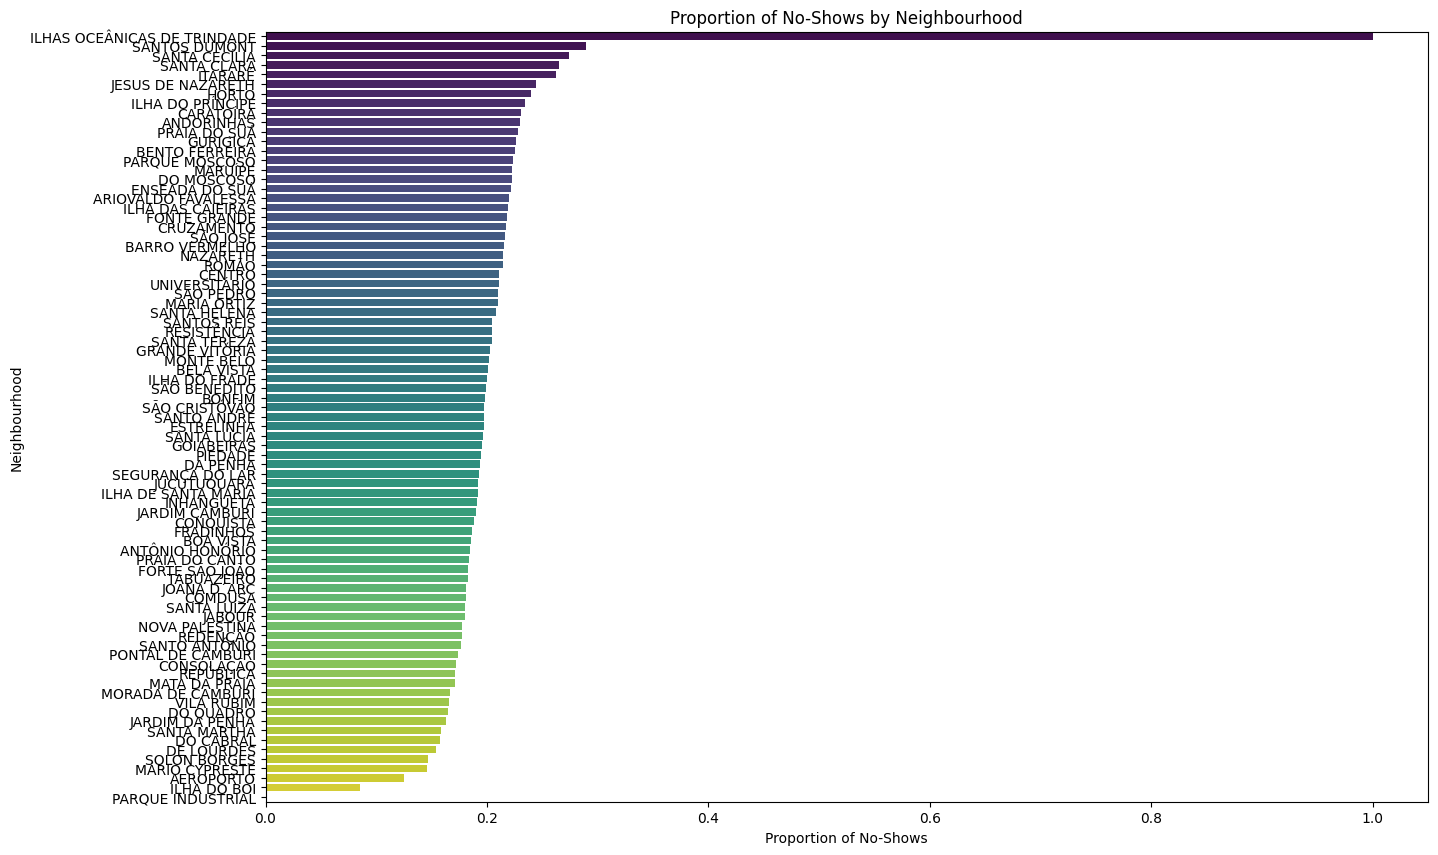

In [61]:
# Group by 'Neighbourhood' and calculate the mean of 'No Show' to get the proportion of no-shows
proportions = df.groupby('Neighbourhood')['No-show'].mean().reset_index()

# Sort the proportions for better visualization
proportions_sorted = proportions.sort_values(by='No-show', ascending=False)

# Now, plot the proportions
plt.figure(figsize=(15, 10))
sns.barplot(y='Neighbourhood', x='No-show', data=proportions_sorted, palette='viridis')
plt.title('Proportion of No-Shows by Neighbourhood')
plt.xlabel('Proportion of No-Shows')
plt.ylabel('Neighbourhood')
plt.savefig('figures/proportion_of_no_shows_by_neighbourhood.png', format='png', dpi=600)
plt.show()

# Assessing the Outlier

Why did this place have a 100% DNA rate? See below to find out

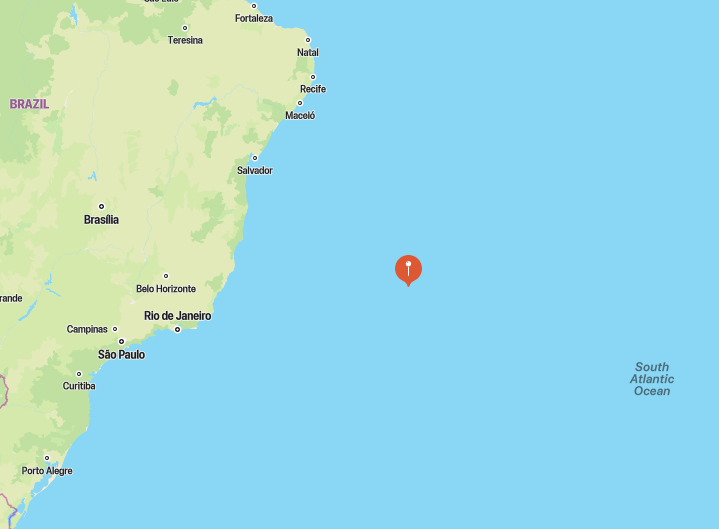

In [62]:
from IPython.display import Image, display

# Display an image file
display(Image(filename='images/Island.png'))

c:\Users\stammm\.virtualenvs\02_Notebook_and_Pipenv-ez3FHhZZ\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\stammm\.virtualenvs\02_Notebook_and_Pipenv-ez3FHhZZ\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


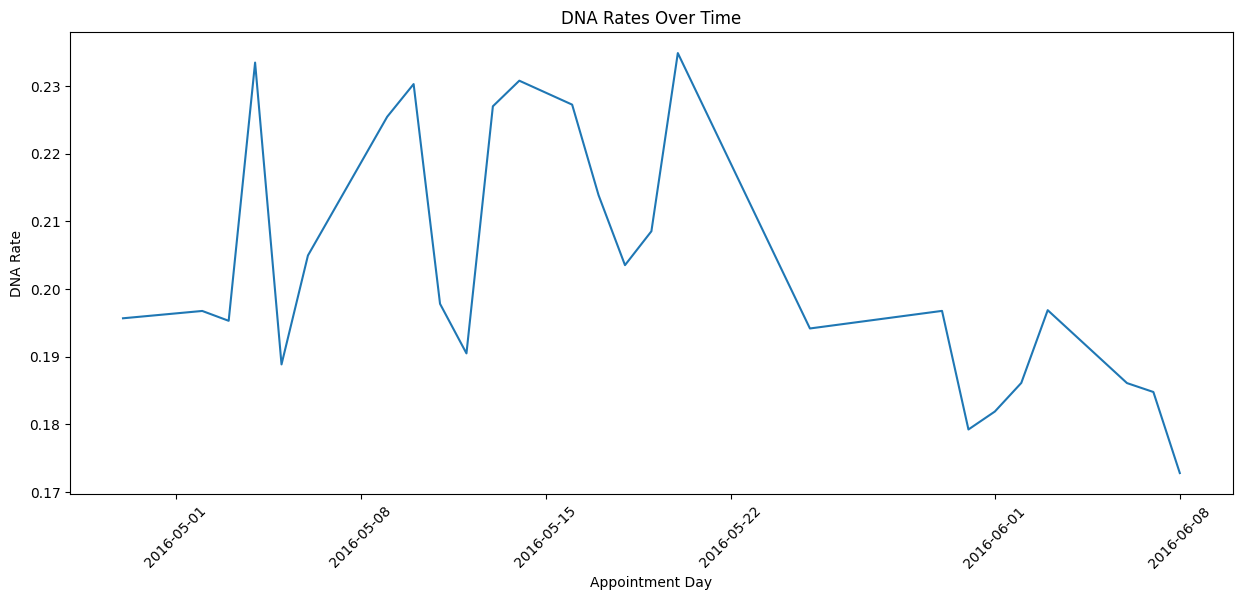

In [63]:
# Calculate DNA rates by 'AppointmentDay'
dna_rates = df.groupby('AppointmentDay')['No-show'].mean().reset_index()

# Plotting DNA rates over time using Seaborn
plt.figure(figsize=(15, 6))
sns.lineplot(data=dna_rates, x='AppointmentDay', y='No-show')
plt.title('DNA Rates Over Time')
plt.xlabel('Appointment Day')
plt.ylabel('DNA Rate')
plt.xticks(rotation=45)
plt.savefig('figures/dna_rates_over_time.png', format='png', dpi=600)
plt.show()

# Regression plotting

Now for more complex plotting. First we will look at the relationship between each feature and not showing up

In [64]:
df['No-show'] = pd.to_numeric(df['No-show'], errors='coerce')

In [65]:
# First we need to calculate the probability of no-show by covariate
def prob_status(dataset, group_by):
    df = dataset.groupby(group_by)['No-show'].mean().reset_index()
    df.columns = [group_by, 'probNoShow']
    return df

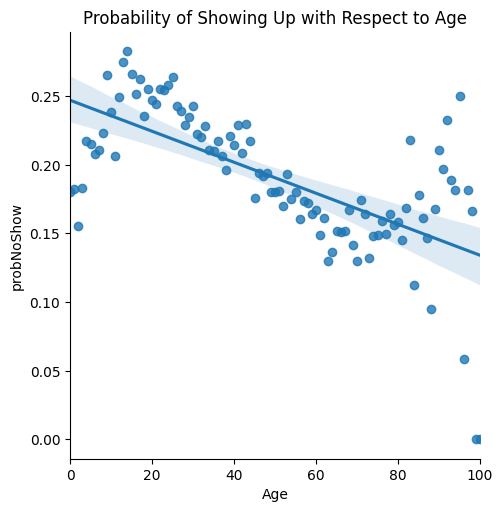

In [66]:
# Assuming 'noShow' is your DataFrame and it's properly formatted
age_prob_df = prob_status(df, 'Age')

sns.lmplot(data=age_prob_df, x='Age', y='probNoShow', fit_reg=True)
plt.xlim(0, 100)
plt.title('Probability of Showing Up with Respect to Age')
plt.savefig('figures/probability of no-show by Age.png', format='png', dpi=600)
plt.show()

In [67]:
# Define the list of variables to iterate over
variables = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

# Ensure the output directory exists
output_dir = 'figures'
os.makedirs(output_dir, exist_ok=True)

for var in variables:
    # Generate the probability DataFrame
    prob_df = prob_status(df, var)
    
    # Plot
    sns.lmplot(data=prob_df, x=var, y='probNoShow', fit_reg=True, logistic=True if var != 'Age' else False)
    plt.title(f'Probability of Showing Up with Respect to {var}')
    
    # Depending on the variable type, adjust xlim and ylim accordingly
    # This is a placeholder; you might need to adjust these limits based on your data
    if prob_df[var].dtype == 'int64' or prob_df[var].dtype == 'float64':
        plt.xlim(prob_df[var].min(), prob_df[var].max())
    plt.ylim(0, 1)
    
    # Save the plot
    plt.savefig(f'{output_dir}/probability_of_no-show_by_{var}.png', format='png', dpi=600)
    plt.close()  # Close the plot to avoid displaying it in the notebook for every iteration

c:\Users\stammm\.virtualenvs\02_Notebook_and_Pipenv-ez3FHhZZ\Lib\site-packages\statsmodels\regression\_tools.py:121: RuntimeWarning: divide by zero encountered in scalar divide
  scale = np.dot(wresid, wresid) / df_resid
c:\Users\stammm\.virtualenvs\02_Notebook_and_Pipenv-ez3FHhZZ\Lib\site-packages\statsmodels\regression\_tools.py:121: RuntimeWarning: invalid value encountered in scalar divide
  scale = np.dot(wresid, wresid) / df_resid
c:\Users\stammm\.virtualenvs\02_Notebook_and_Pipenv-ez3FHhZZ\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
c:\Users\stammm\.virtualenvs\02_Notebook_and_Pipenv-ez3FHhZZ\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=Perfect

In [68]:
def probStatusCategorical(df, group_by):
    rows = []
    for item in group_by:
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            n = len(df[(df[item] == level) & (df['No-show'] == 1)])  # Assuming 1 indicates a no-show
            row.update({'Level': str(level), 'Probability': n / total if total > 0 else 0})
            rows.append(row)
    return pd.DataFrame(rows)


In [69]:
# Now for Bokeh which creates interactive plots

output_notebook()

conditions = ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']
data = probStatusCategorical(df, conditions)

# Prepare Condition_Level and Level
data['Condition_Level'] = data.apply(lambda x: f"{x['Condition']}_{x['Level']}", axis=1)
data['Level'] = data['Level'].astype(str)

# Correctly define condition_levels from the unique values in 'Condition_Level'
condition_levels = sorted(data['Condition_Level'].unique())

# Extend the Category20 palette
num_unique_conditions = len(condition_levels)
extended_palette = [color for color, _ in zip(cycle(Category20[20]), range(num_unique_conditions))]

# Use the extended_palette in the factor_cmap
color_map = factor_cmap('Condition_Level', palette=extended_palette, factors=condition_levels)

# Create figure with correct x_range
p = figure(x_range=FactorRange(*condition_levels), height=350, title="Probability of No-Show by Condition and Level",
           toolbar_location=None, tools="", sizing_mode="stretch_width")

source = ColumnDataSource(data)

# Add bar renderer with a color mapper
p.vbar(x='Condition_Level', top='Probability', width=0.9, source=source, line_color='white', fill_color=color_map)

# Add hover tool
hover = HoverTool()
hover.tooltips = [
    ("Condition", "@Condition"),
    ("Level", "@Level"),
    ("Probability", "@Probability{0.2f}")
]
p.add_tools(hover)

# Plot adjustments
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1.2
p.xgrid.grid_line_color = None

show(p)

Loading BokehJS ...

# Predicting Stuff - Feature Engineering

I can see from the above that the signal here with these features is weak so this is going to be difficult but I will try to demonstrate the nuts and bolts of feature engineering in this case for DNA rates. 

In [70]:
# First I want to extract the days of the week as that will provide further covariates

# Extract the day of the week - numerical representation (Monday=0, Sunday=6)
df['ScheduledDay_DayOfWeek_Num'] = df['ScheduledDay'].dt.dayofweek

# Extract the day of the week - name representation ("Monday", "Tuesday", etc.)
df['ScheduledDay_DayOfWeek_Name'] = df['ScheduledDay'].dt.day_name()

In [71]:

output_notebook()

conditions = ['ScheduledDay_DayOfWeek_Name']
data = probStatusCategorical(df, conditions)

# Ensure days of the week are ordered correctly for plotting
days_of_week_ordered = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Level'] = pd.Categorical(data['Level'], categories=days_of_week_ordered, ordered=True)
data.sort_values('Level', inplace=True)

data['Condition_Level'] = data.apply(lambda x: f"{x['Condition']}_{x['Level']}", axis=1)

source = ColumnDataSource(data)

# Use the days of the week as factors to ensure proper order in the plot
condition_levels = [f"ScheduledDay_DayOfWeek_Name_{day}" for day in days_of_week_ordered]

# Extend the Category20 palette to ensure enough colors
extended_palette = [color for color, _ in zip(cycle(Category20[20]), range(len(condition_levels)))]

# Use the extended_palette in the factor_cmap
color_map = factor_cmap('Condition_Level', palette=extended_palette, factors=condition_levels)

# Create figure with FactorRange tailored for days of the week
p = figure(x_range=FactorRange(*condition_levels), height=350, title="Probability of No-Show by Day of Week",
           toolbar_location=None, tools="", sizing_mode="stretch_width")

# Add bar renderer with a color mapper
p.vbar(x='Condition_Level', top='Probability', width=0.9, source=source, line_color='white', fill_color=color_map)

# Add hover tool
hover = HoverTool()
hover.tooltips = [("Day", "@Level"), ("Probability", "@Probability{0.2f}")]
p.add_tools(hover)

# Set plot parameters
p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xaxis.major_label_orientation = 1
p.xgrid.grid_line_color = None

show(p)


Loading BokehJS ...

In [72]:
# Print Total Count for 'Neighbourhood'
print("Total Count for `Neighbourhood` => {}".format(df.Neighbourhood.unique().size))

Total Count for `Neighbourhood` => 81


In [73]:

# Initialize a LabelEncoder object
le = LabelEncoder()

# Gender
df['Gender'] = le.fit_transform(df['Gender'])

# Reset LabelEncoder for the next column to ensure fresh encoding
le = LabelEncoder()
# Neighbourhood
df['Neighbourhood'] = le.fit_transform(df['Neighbourhood'])

le = LabelEncoder()
# ScheduledDay_DOW
df['ScheduledDay_DOW'] = le.fit_transform(df['ScheduledDay_DayOfWeek_Name'])

# NoShow
le = LabelEncoder()
df['No-show'] = le.fit_transform(df['No-show'])

print("LabelEncoder Completed")


LabelEncoder Completed


In [74]:
# Now break these up to get more features out of them

df['ScheduledDay_Y'] = df['ScheduledDay'].dt.year
df['ScheduledDay_M'] = df['ScheduledDay'].dt.month
df['ScheduledDay_D'] = df['ScheduledDay'].dt.day
df.drop(['ScheduledDay'], axis=1, inplace=True)

df['AppointmentDay_Y'] = df['AppointmentDay'].dt.year
df['AppointmentDay_M'] = df['AppointmentDay'].dt.month
df['AppointmentDay_D'] = df['AppointmentDay'].dt.day
df.drop(['AppointmentDay'], axis=1, inplace=True)

# Final Tidying
df.PatientId = df.PatientId.astype(int)
df.drop(['Sched_Appt'], axis=1, inplace=True)
df.drop(['ScheduledDay_DayOfWeek_Name'], axis=1, inplace=True)
df.drop(['PatientId'], axis=1, inplace=True)
df.drop(['AppointmentID'], axis=1, inplace=True)

In [75]:
print("Features in the DataFrame => {}".format(df.columns.ravel()))

Features in the DataFrame => Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'Sched_To_Appt', 'ScheduledDay_DayOfWeek_Num', 'ScheduledDay_DOW',
       'ScheduledDay_Y', 'ScheduledDay_M', 'ScheduledDay_D',
       'AppointmentDay_Y', 'AppointmentDay_M', 'AppointmentDay_D'],
      dtype='object')


In [76]:
df.sample(n=7)

Gender  Age  Neighbourhood  Scholarship  Hypertension  Diabetes  \
19668        0   57             69            0             0         0   
96979        1   36             70            1             0         0   
73907        1    0             77            0             0         0   
75885        1   40             59            0             0         0   
44213        1    4             13            0             0         0   
104501       1   43             57            0             0         0   
16893        0   50             59            0             0         0   

        Alcoholism  Handicap  SMS_received  No-show  Sched_To_Appt  \
19668            0         0             0        0             -1   
96979            0         0             1        1             66   
73907            0         0             0        0             -1   
75885            0         0             0        1             22   
44213            0         0             0        0             -1   
104501           0         1             0        0              1   
16893            0         0             0        0              3   

        ScheduledDay_DayOfWeek_Num  ScheduledDay_DOW  ScheduledDay_Y  \
19668                            0                 1            2016   
96979                            3                 3            2016   
73907                            0                 1            2016   
75885                            1                 4            2016   
44213                            2                 5            2016   
104501                           2                 5            2016   
16893                            3                 3            2016   

        ScheduledDay_M  ScheduledDay_D  AppointmentDay_Y  AppointmentDay_M  \
19668                5               9              2016                 5   
96979                3              31              2016                 6   
73907                5              30              2016                 5   
75885                4              26              2016                 5   
44213                5              25              2016                 5   
104501               6               1              2016                 6   
16893                5              12              2016                 5   

        AppointmentDay_D  
19668                  9  
96979                  6  
73907                 30  
75885                 19  
44213                 25  
104501                 3  
16893                 16

# Modelling Time

Now we can build a model

In [77]:
# Get the Dependent and Independent Features.
X = df.drop(['No-show'], axis=1)

y = df['No-show']

In [78]:
# To help your intuition of what X looks like
X.sample(3)

Gender  Age  Neighbourhood  Scholarship  Hypertension  Diabetes  \
100992       0   43             66            0             1         0   
88921        0   28             48            0             0         0   
101325       0   42             72            0             0         0   

        Alcoholism  Handicap  SMS_received  Sched_To_Appt  \
100992           1         0             0             17   
88921            0         0             0             -1   
101325           1         0             1             26   

        ScheduledDay_DayOfWeek_Num  ScheduledDay_DOW  ScheduledDay_Y  \
100992                           0                 1            2016   
88921                            1                 4            2016   
101325                           4                 0            2016   

        ScheduledDay_M  ScheduledDay_D  AppointmentDay_Y  AppointmentDay_M  \
100992               5              16              2016                 6   
88921                6               7              2016                 6   
101325               5               6              2016                 6   

        AppointmentDay_D  
100992                 3  
88921                  7  
101325                 2

In [79]:
# And y - what we are predicting
y.sample(4)

44263    0
82209    0
22380    0
37402    0
Name: No-show, dtype: int64

In [80]:
# Create groups
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Classifier

Lets start with a simple Log Reg Model

In [83]:
# Initialize and fit the logistic regression model
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

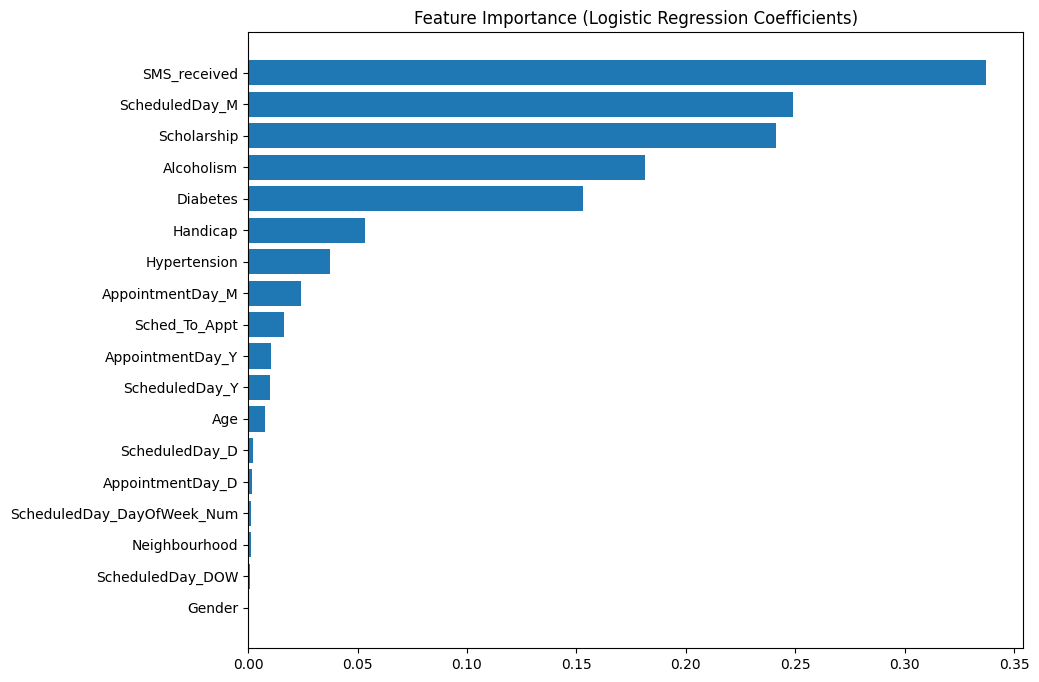

In [84]:
# Plot relative feature importances

feature_importance = abs(lr_model.coef_[0])
features = X.columns
sorted_idx = feature_importance.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.show()

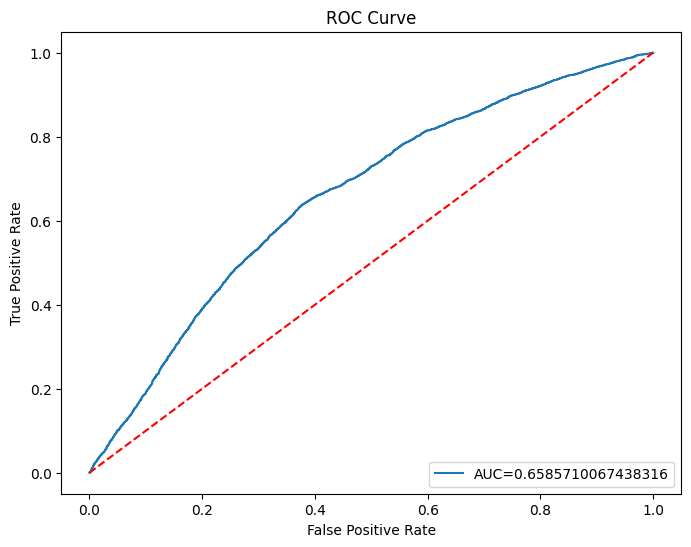

In [85]:
# Predict probabilities
y_pred_proba = lr_model.predict_proba(X_test)[::,1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], 'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC Curve')
plt.savefig('figures/ROC_curve_for_logistic_regression_classifier.png', format='png', dpi=600)
plt.show()


In [86]:
# Accuracy
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7977289178429243


# Decision Tree

A DT is a very simple type of model - watch this

In [87]:
# Now for DT
dt_clf = DecisionTreeClassifier(random_state=0)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

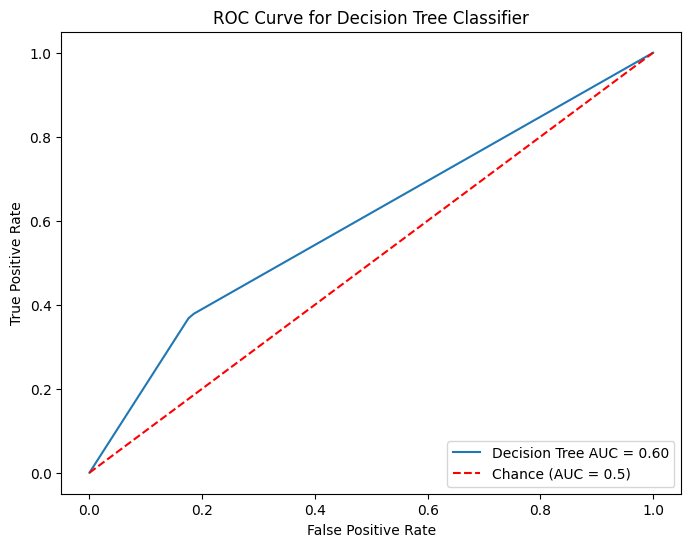

In [88]:
# Predict probabilities for the positive class (1)
y_pred_proba_dt = dt_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree AUC = {auc_dt:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Chance (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc='lower right')
plt.savefig('figures/ROC_curve_for_decision_tree_classifier.png', format='png', dpi=600)
plt.show()


In [89]:
# Now inspect the feature importances
print("Feature Importance:\n")
for name, importance in zip(X.columns, np.sort(dt_clf.feature_importances_)[::-1]):
    print("{} -- {:.2f}".format(name, importance))

# The model is so bad I can't be bothered to plot it

Feature Importance:

Gender -- 0.24
Age -- 0.23
Neighbourhood -- 0.18
Scholarship -- 0.09
Hypertension -- 0.07
Diabetes -- 0.04
Alcoholism -- 0.03
Handicap -- 0.03
SMS_received -- 0.02
Sched_To_Appt -- 0.02
ScheduledDay_DayOfWeek_Num -- 0.01
ScheduledDay_DOW -- 0.01
ScheduledDay_Y -- 0.01
ScheduledDay_M -- 0.01
ScheduledDay_D -- 0.01
AppointmentDay_Y -- 0.00
AppointmentDay_M -- 0.00
AppointmentDay_D -- 0.00


In [90]:
# Check model accuracy
dt_clf.score(X_test, y_test)

0.7329442634817228

# Random Forest Classifier

Let's try a different type of model to see if we can improve the performance

In [93]:
# Instantiate RF Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

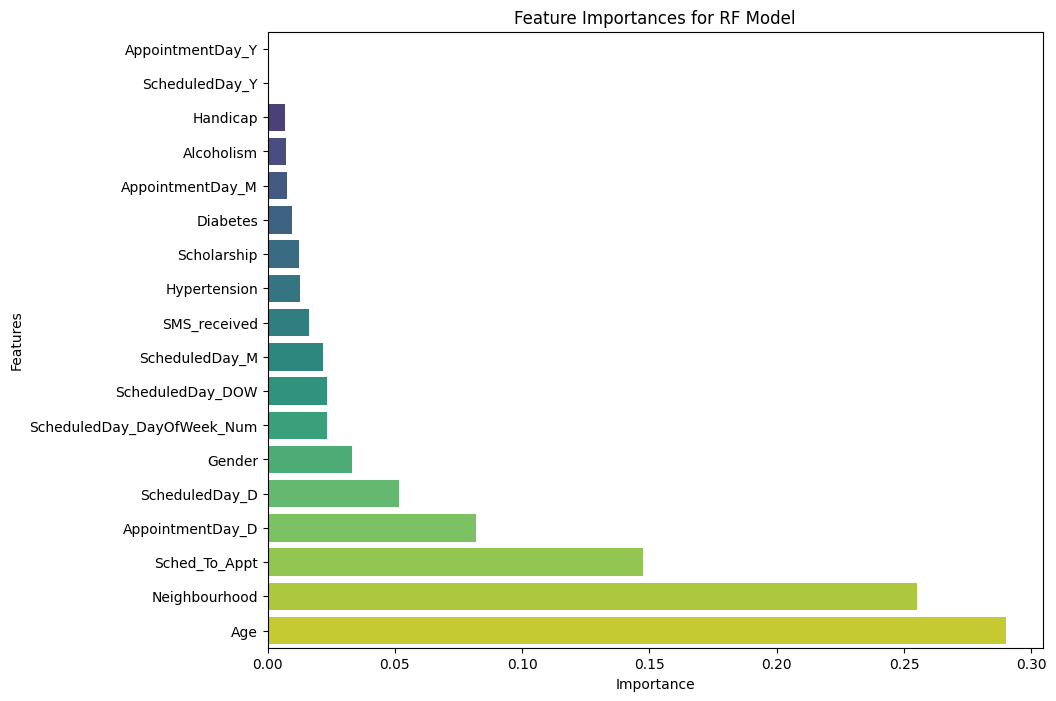

In [94]:
# Plotting RF Features
feature_names = X.columns
feature_importances = rf_clf.feature_importances_

# Create a DataFrame for the features and their importances
features_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 8))
sns.barplot(data=features_df, x='Importance', y='Feature', palette='viridis')

plt.title('Feature Importances for RF Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.savefig('figures/feature_importances_for_random_forest_classifier.png', format='png', dpi=600)
plt.show()


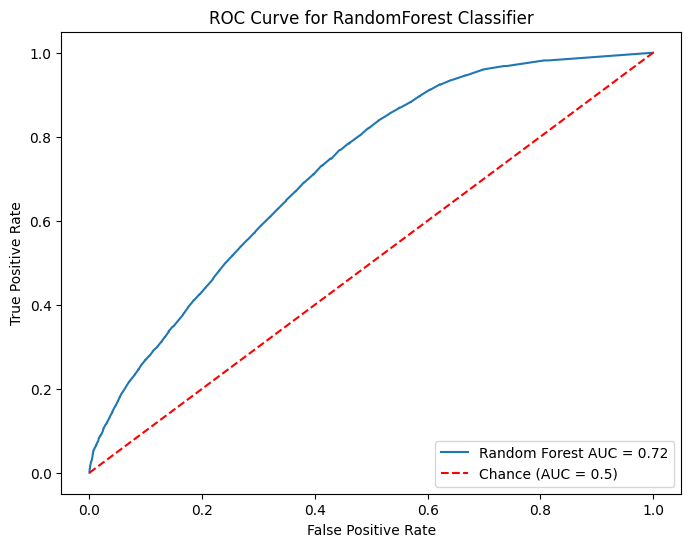

In [95]:
# Predict probabilities for the positive class (1)
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], 'r--', label='Chance (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForest Classifier')
plt.legend(loc='lower right')
plt.savefig('figures/ROC_curve_for_random_forest_classifier.png', format='png', dpi=600)
plt.show()


In [96]:
rf_clf.score(X_test, y_test)

0.7868711545421643

# The End

However, the journey has just begun. Don't worry if some of the later stuff didn't make sense. Exploring your data is far more important as it enables you to really understand the pros and cons of your model. In this case I knew the model would not be great but an AUC of 0.7 is not bad. I was not surpised the DT sucked and LR was ok with a better RF as smaller datasets often follow this pattern. I suspect with a bit of tweaking we could get the LR model to be nearly as good as the RF but that is for another time - Matt out! 😎